<a href="https://colab.research.google.com/github/EnterTheBeginning/SmartHomeEnergyForecasting/blob/master/HomeFJupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
from pylab import figure,axes,pie,title,show

In [0]:
df = pd.read_csv('data/HomeF/2016/HomeF-meter2_2016.csv',index_col='Date & Time',parse_dates=['Date & Time'])

In [0]:
df.head()

,Usage [kW],Generation [kW],WaterHeater [kW],Solar [kW],Refrigerator [kW],Microwave [kW],Furnace [kW],WaterHeater3 [kW],WaterHeater2 [kW],WaterHeater1 [kW],...,Dishwasher_Disposal [kW],Kit_SinkWall [kW],Family_Rm [kW],Kit_Half-Bath_Foyer [kW],Washing_Machine [kW],Guest_Bdrm_SmkDet [kW],Dryer [kW],Basement [kW],Phase_B [kW],Phase_A [kW]
Date & Time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.711407,0.010633,0.003387,0.010633,0.124854,0.003152,0.008454,0.000973,0.000758,0.001656,...,0.000163,0.007337,0.032004,0.016924,0.002051,0.035576,0.003058,0.025669,0.539356,0.172051
2016-01-01 00:15:00,0.764641,0.010922,0.002976,0.010922,0.022447,0.003491,0.166584,0.000560,0.000556,0.001860,...,0.000139,0.006689,0.031601,0.016721,0.001993,0.033170,0.002943,0.025352,0.596543,0.168098
2016-01-01 00:30:00,0.797838,0.010831,0.003871,0.010831,0.089558,0.003437,0.036343,0.000978,0.000889,0.002004,...,0.000104,0.007033,0.031698,0.016774,0.002082,0.034226,0.003029,0.025446,0.628852,0.168986
2016-01-01 00:45:00,0.883651,0.011289,0.003856,0.011289,0.058804,0.003429,0.193307,0.000860,0.000769,0.002227,...,0.000048,0.006831,0.030987,0.016384,0.002196,0.032569,0.003361,0.024742,0.719163,0.164488
2016-01-01 01:00:00,0.594470,0.010449,0.002047,0.010449,0.031788,0.003083,0.008712,0.000416,0.000438,0.001193,...,0.000047,0.006911,0.031721,0.016867,0.001903,0.032852,0.002922,0.025539,0.428216,0.166254


In [0]:
df = df[~df.index.duplicated()]


In [0]:
weather = pd.read_csv('data/homeF2016.csv',parse_dates=['time'])

In [0]:
weather.head()

,temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,36.52,clear-night,0.61,10.0,Clear,29.76,1016.88,9.11,NaN,1451624400,281,0.0,24.27,0.0
1,36.32,partly-cloudy-night,0.60,10.0,Mostly Cloudy,29.60,1016.23,8.93,0.75,1451628000,285,0.0,23.71,0.0
2,35.77,clear-night,0.61,10.0,Clear,29.49,1015.99,7.90,NaN,1451631600,282,0.0,23.57,0.0
3,35.62,clear-night,0.63,10.0,Clear,31.04,1016.03,5.35,NaN,1451635200,264,0.0,24.11,0.0
4,35.97,clear-night,0.62,10.0,Clear,30.41,1015.89,6.80,NaN,1451638800,267,0.0,24.13,0.0


In [0]:
# Converting Unix Timestamp to Date 
weather['time'] = pd.to_datetime(weather['time'],unit='s')

In [0]:
weather.head()

,temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,36.52,clear-night,0.61,10.0,Clear,29.76,1016.88,9.11,NaN,2016-01-01 05:00:00,281,0.0,24.27,0.0
1,36.32,partly-cloudy-night,0.60,10.0,Mostly Cloudy,29.60,1016.23,8.93,0.75,2016-01-01 06:00:00,285,0.0,23.71,0.0
2,35.77,clear-night,0.61,10.0,Clear,29.49,1015.99,7.90,NaN,2016-01-01 07:00:00,282,0.0,23.57,0.0
3,35.62,clear-night,0.63,10.0,Clear,31.04,1016.03,5.35,NaN,2016-01-01 08:00:00,264,0.0,24.11,0.0
4,35.97,clear-night,0.62,10.0,Clear,30.41,1015.89,6.80,NaN,2016-01-01 09:00:00,267,0.0,24.13,0.0


In [0]:
weather['time'] = weather['time'].astype('datetime64[ns]')
weather = weather.set_index("time")

In [0]:
weather.head()

,temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,,,
2016-01-01 05:00:00,36.52,clear-night,0.61,10.0,Clear,29.76,1016.88,9.11,NaN,281,0.0,24.27,0.0
2016-01-01 06:00:00,36.32,partly-cloudy-night,0.60,10.0,Mostly Cloudy,29.60,1016.23,8.93,0.75,285,0.0,23.71,0.0
2016-01-01 07:00:00,35.77,clear-night,0.61,10.0,Clear,29.49,1015.99,7.90,NaN,282,0.0,23.57,0.0
2016-01-01 08:00:00,35.62,clear-night,0.63,10.0,Clear,31.04,1016.03,5.35,NaN,264,0.0,24.11,0.0
2016-01-01 09:00:00,35.97,clear-night,0.62,10.0,Clear,30.41,1015.89,6.80,NaN,267,0.0,24.13,0.0


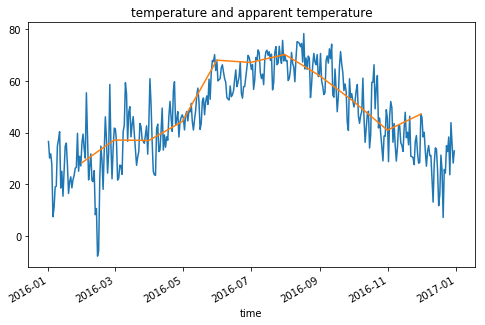

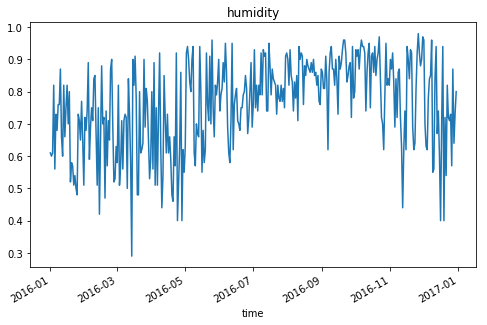

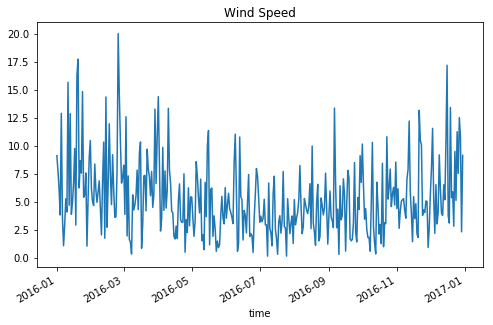

In [0]:
rcParams['figure.figsize'] = 8, 5

weather['temperature'].asfreq('D').plot()
weather['apparentTemperature'].asfreq('M').plot()

plt.title('temperature and apparent temperature')
plt.show()

weather['humidity'].asfreq('D').plot()
plt.title('humidity')
plt.show()

weather['windSpeed'].asfreq('D').plot()
plt.title('Wind Speed')
plt.show()

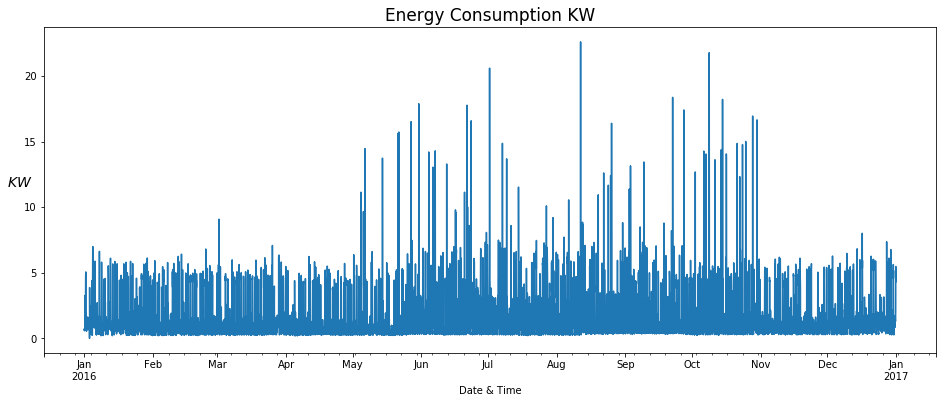

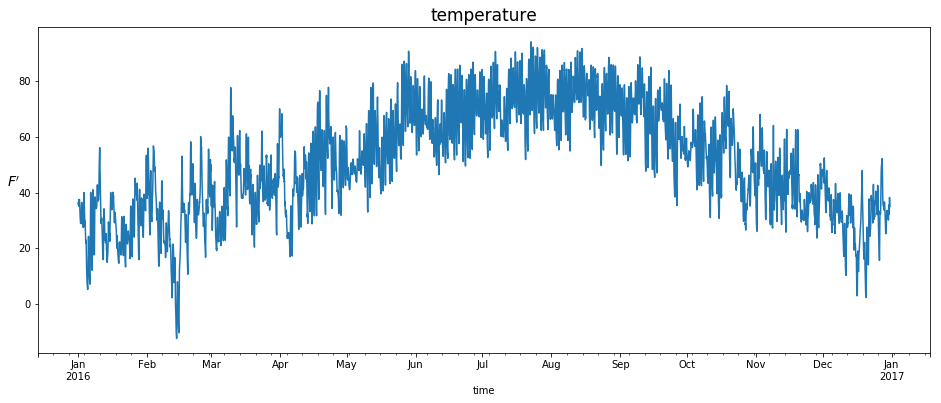

In [0]:
# Overall Energy Consumption
df['Usage [kW]'].asfreq('H').plot()
plt.title('Energy Consumption KW',fontsize=17)
plt.ylabel("$KW$", rotation=0,fontsize=14)
dfuse=df['Usage [kW]']
plt.show()

weather['temperature'].asfreq('H').plot()
plt.ylabel("$F'$", rotation=0,fontsize=14)

plt.title('temperature',fontsize=17)
plt.show()



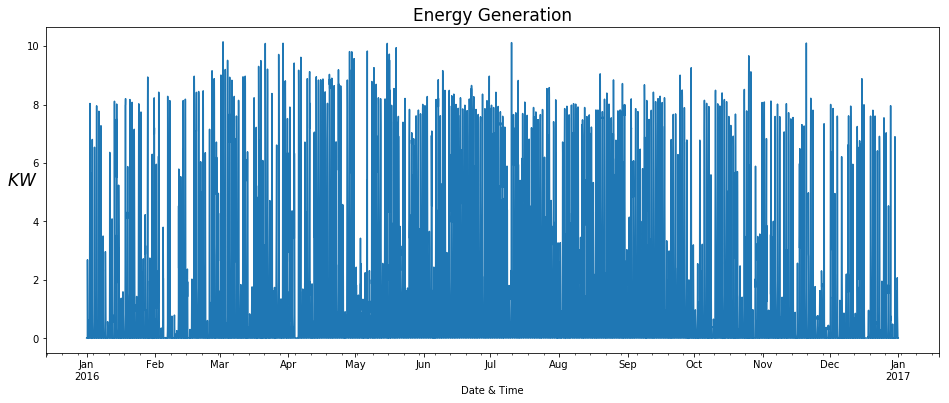

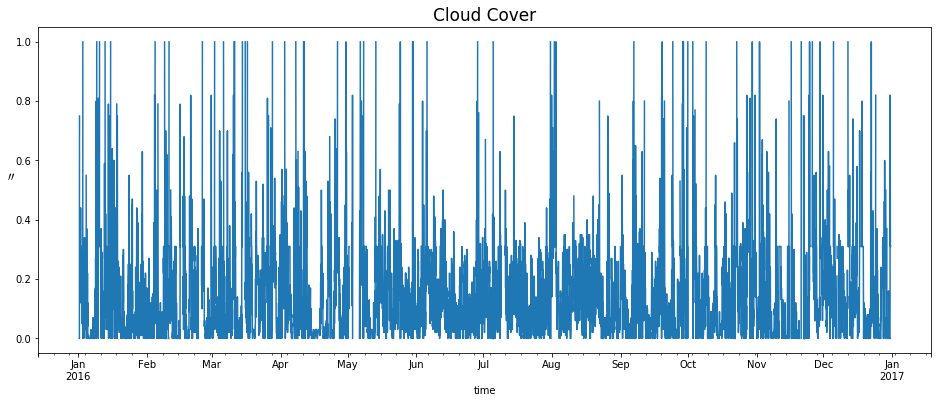

In [0]:
# Overall Energy Generation vs Cloud cover
df['Generation [kW]'].asfreq('H').plot()
dfgen=df['Generation [kW]']

plt.title('Energy Generation',fontsize=17)
plt.ylabel("$KW$", rotation=0,fontsize=17)

plt.show()

weather['cloudCover'].asfreq('H').plot()
plt.ylabel("$''$", rotation=0,fontsize=17)

plt.title('Cloud Cover',fontsize=17)
plt.show()



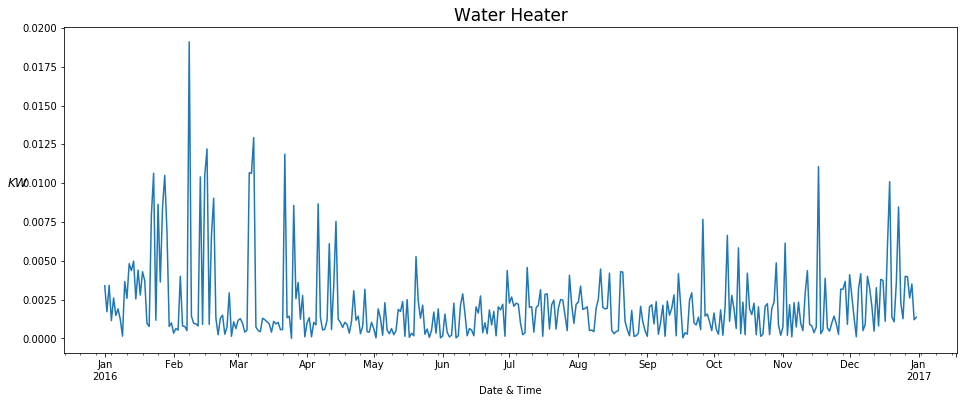

In [0]:
df['WaterHeater [kW]'].asfreq('D').plot()
dfwaterheater =df['WaterHeater [kW]']
plt.title('Water Heater',fontsize=17)
plt.ylabel("$KW$", rotation=0,fontsize=12)

plt.show()


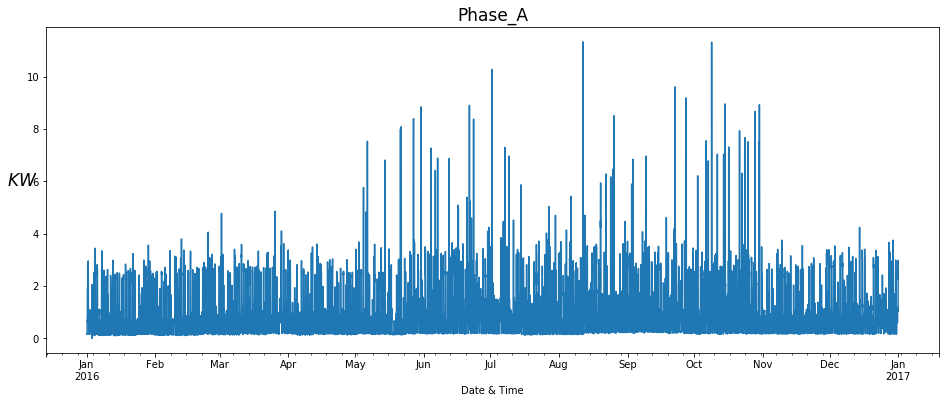

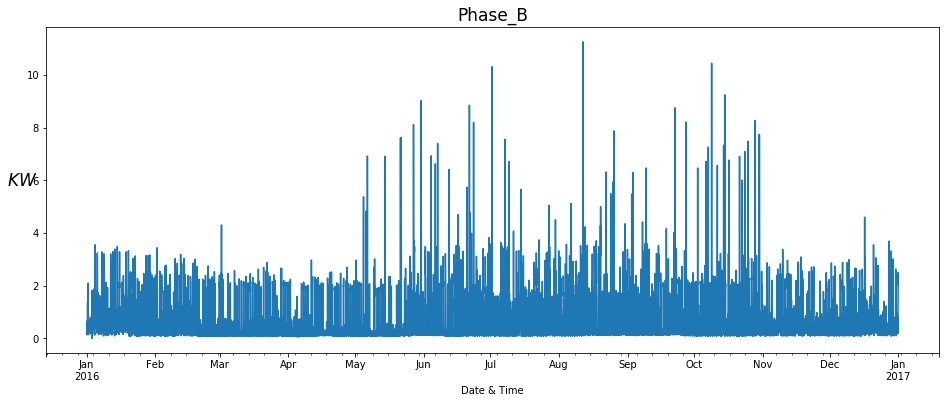

In [0]:
# Phase 1 and 2 Comparison
df['Phase_A [kW]'].asfreq('H').plot()
dfphase1 = df['Phase_A [kW]']
plt.title('Phase_A',fontsize=17)
plt.ylabel("$KW$", rotation=0,fontsize=17)

plt.show()

df['Phase_B [kW]'].asfreq('H').plot()
plt.ylabel("$KW$", rotation=0,fontsize=17)
dfphase2 = df['Phase_B [kW]']

plt.title('Phase_B',fontsize=17)
plt.show()



# Downsampling 



Time series is resampled from high frequency to low frequency(Weekly to monthly frequency). It involves aggregation of existing data.

In [0]:
df.shape

(501847, 23)

In [0]:
df_downsample = df.resample('D').pad()
df_downsample.shape
df_downsample.head()


,Usage [kW],Generation [kW],WaterHeater [kW],Solar [kW],Refrigerator [kW],Microwave [kW],Furnace [kW],WaterHeater3 [kW],WaterHeater2 [kW],WaterHeater1 [kW],...,Dishwasher_Disposal [kW],Kit_SinkWall [kW],Family_Rm [kW],Kit_Half-Bath_Foyer [kW],Washing_Machine [kW],Guest_Bdrm_SmkDet [kW],Dryer [kW],Basement [kW],Phase_B [kW],Phase_A [kW]
Date & Time,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0.711407,0.010633,0.003387,0.010633,0.124854,0.003152,0.008454,0.000973,0.000758,0.001656,...,0.000163,0.007337,0.032004,0.016924,0.002051,0.035576,0.003058,0.025669,0.539356,0.172051
2016-01-02,0.544152,0.009940,0.001716,0.009940,0.000908,0.003476,0.008707,0.000300,0.000364,0.001051,...,0.000096,0.006400,0.030027,0.016669,0.001907,0.033110,0.002842,0.025170,0.379126,0.165027
2016-01-03,0.819613,0.010347,0.003416,0.010347,0.000664,0.003890,0.009011,0.000707,0.000700,0.002009,...,0.000014,0.006129,0.031967,0.017008,0.002212,0.020848,0.003353,0.055739,0.633956,0.185658
2016-01-04,0.923823,0.009927,0.001147,0.009927,0.060247,0.003556,0.008827,0.000071,0.000258,0.000818,...,0.000311,0.006804,0.029989,0.015758,0.002196,0.019222,0.002633,0.274234,0.533611,0.390212
2016-01-05,1.094134,0.009913,0.002604,0.009913,0.027711,0.004180,0.009443,0.000378,0.000604,0.001622,...,0.000323,0.006321,0.030170,0.015930,0.002219,0.019320,0.002486,0.284363,0.691650,0.402484


With the use of date_range, we can return a fixed frequency datetimeindex. It is quite useful time series attribute for pre-existing data or arranging the whole data around the time series.
This can be used to declare sessions including summer


In [0]:
dr1 = pd.date_range(start='1/1/16', end='1/9/16')
dr1


DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09'],
              dtype='datetime64[ns]', freq='D')

In [0]:
dr2 = pd.date_range(start='1/1/16', end='1/1/17', freq='M')
dr2


DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', freq='M')

In [0]:
dr3 = pd.date_range(end='1/4/2014', periods=8)
dr3


DatetimeIndex(['2013-12-28', '2013-12-29', '2013-12-30', '2013-12-31',
               '2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04'],
              dtype='datetime64[ns]', freq='D')

In [0]:
dr4 = pd.date_range(start='2016-04-24', end='2016-11-27', periods=7)
dr4


DatetimeIndex(['2016-04-24 00:00:00', '2016-05-30 04:00:00',
               '2016-07-05 08:00:00', '2016-08-10 12:00:00',
               '2016-09-15 16:00:00', '2016-10-21 20:00:00',
               '2016-11-27 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [0]:
dfgen_day = dfgen.iloc[:100]

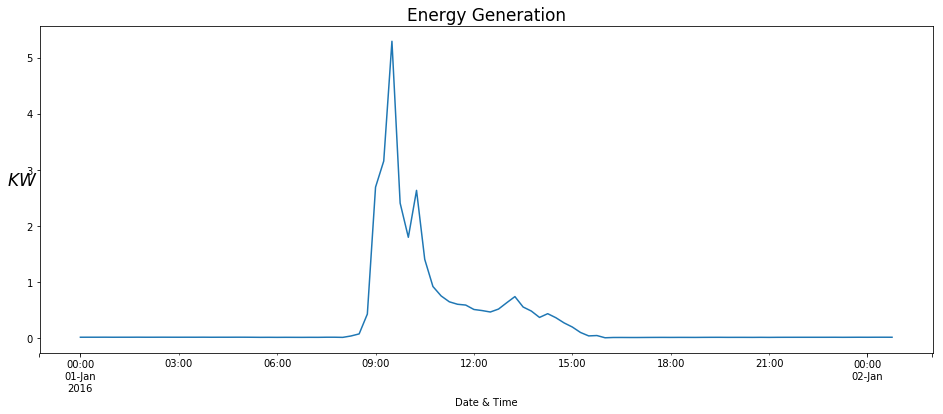

In [0]:
dfgen_day.plot()
dfgen=df['Generation [kW]']

plt.title('Energy Generation',fontsize=17)
plt.ylabel("$KW$", rotation=0,fontsize=17)

plt.show()


# Window functions



*Using* Window functions to identify sub periods, calculates sub-metrics of sub-periods.


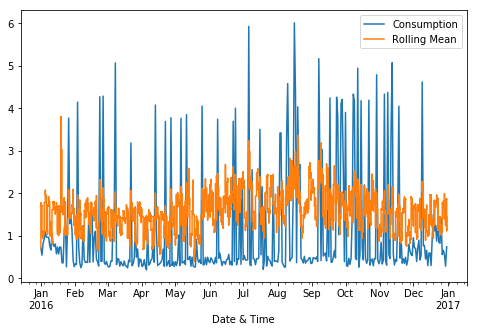

In [0]:
rolling_df =df['Usage [kW]'].rolling('D').mean()
df['Usage [kW]'].asfreq('D').plot()
rolling_df.plot()
plt.legend(['Consumption','Rolling Mean'])
# Plotting a rolling mean of 1 day
plt.show()


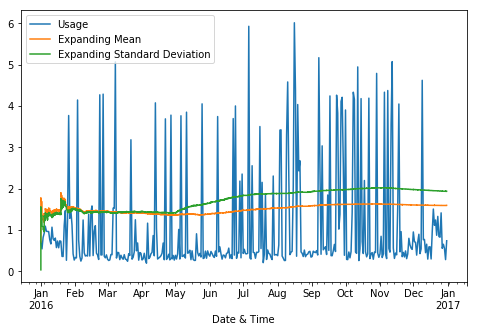

In [0]:
df_mean = df['Usage [kW]'].expanding().mean()
df_std = df['Usage [kW]'].expanding().std()
df['Usage [kW]'].asfreq('D').plot()
df_mean.plot()
df_std.plot()
plt.legend(['Usage','Expanding Mean','Expanding Standard Deviation'])
plt.show()


# Autocorrelation

Autocorrelation - The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.  
Partial Autocorrelation - The partial autocorrelation function can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.
Source: Quora



In [0]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm



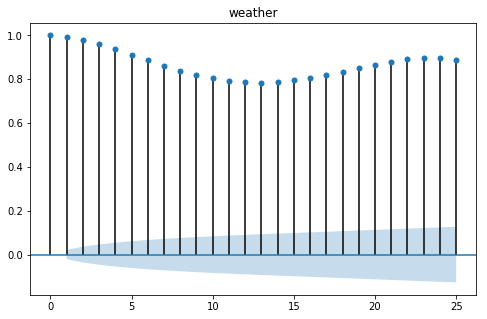

In [0]:
plot_acf(weather['apparentTemperature'],lags=25,title="weather")
plt.show()

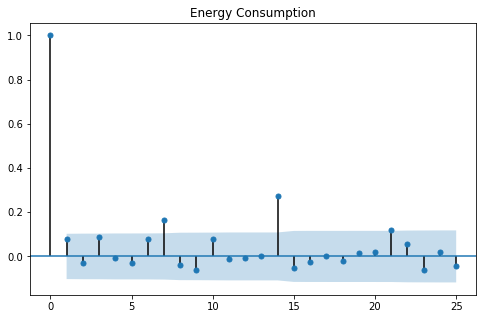

In [0]:
plot_acf(df_downsample['Usage [kW]'],lags=25,title="Energy Consumption")
plt.show()

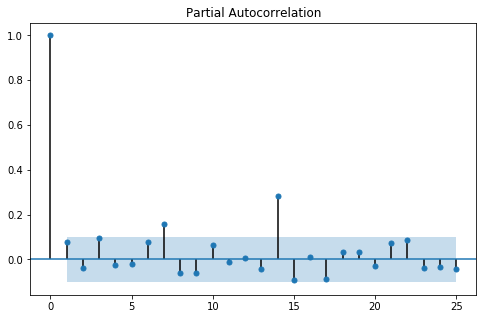

In [0]:
plot_pacf(df_downsample['Usage [kW]'],lags=25)
plt.show()


# Trends, seasonality and noise

These are the components of a time series  

Trend - Consistent upwards or downwards slope of a time series  
Seasonality - Clear periodic pattern of a time series(like sine funtion)  
Noise - Outliers or missing   

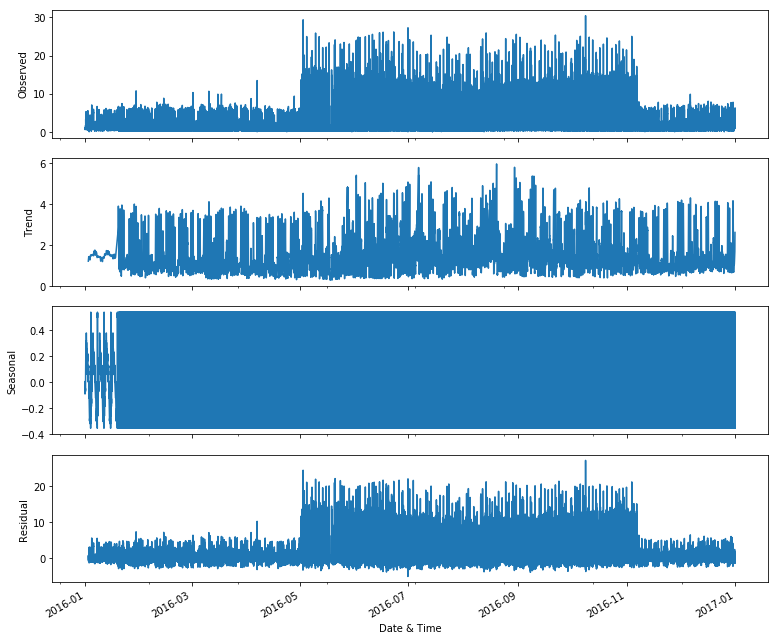

In [0]:
# Now, for decomposition...
rcParams['figure.figsize'] = 11, 9
decomposed_df_volume = sm.tsa.seasonal_decompose(df['Usage [kW]'],freq=360) # The frequncy is annual
figure = decomposed_df_volume.plot()
plt.show()

There is clearly an upward daily trend in the above plot.  
You can also see the uniform seasonal change.  
Non-uniform noise that represent outliers and missing values  


# White noise


In progress...  
Constant mean  
Constant variance  
Zero auto-correlation at all lags  


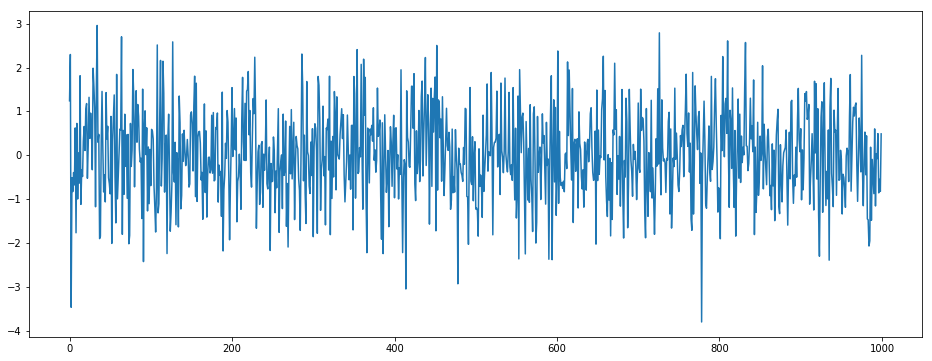

In [0]:
rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)